# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | bocas del toro
Processing Record 10 of Set 1 | peniche
Processing Record 11 of Set 1 | lerwick
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | jiupu
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | san carlos
Processing Record 19 of Set 1 | kingaroy
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | gadzhiyevo
Proc

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,12.07,72,0,5.58,AU,1741119689
1,adamstown,-25.0660,-130.1015,25.56,77,14,6.41,PN,1741119690
2,west island,-12.1568,96.8225,27.99,89,40,4.63,CC,1741119692
3,port-aux-francais,-49.3500,70.2167,6.00,76,81,8.22,TF,1741119693
4,bethel,41.3712,-73.4140,9.13,64,100,4.12,US,1741119695


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.07,72,0,5.58,AU,1741119689
1,adamstown,-25.0660,-130.1015,25.56,77,14,6.41,PN,1741119690
2,west island,-12.1568,96.8225,27.99,89,40,4.63,CC,1741119692
3,port-aux-francais,-49.3500,70.2167,6.00,76,81,8.22,TF,1741119693
4,bethel,41.3712,-73.4140,9.13,64,100,4.12,US,1741119695


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

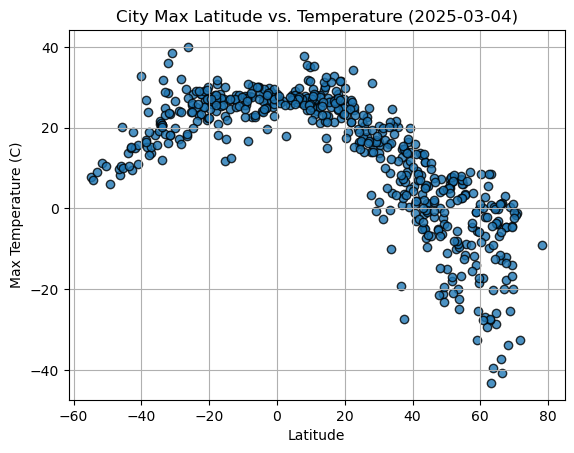

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

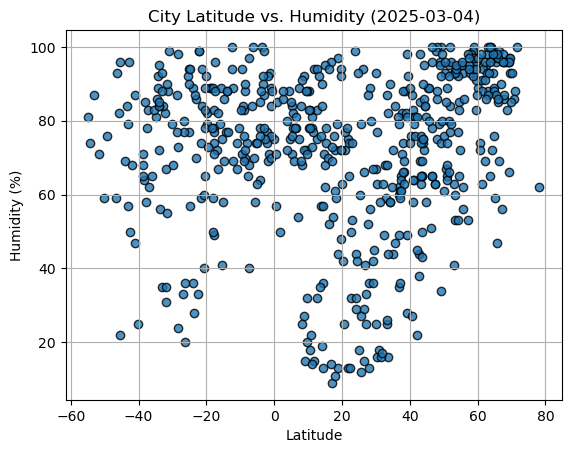

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

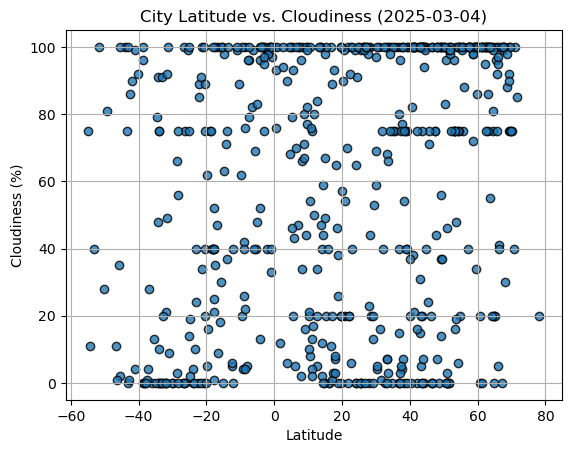

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

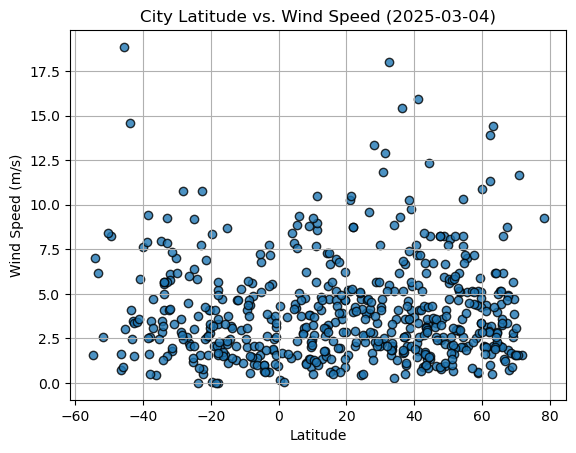

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Northern_Hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
Northern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bethel,41.3712,-73.4140,9.13,64,100,4.12,US,1741119695
6,naze,28.3667,129.4833,15.51,89,100,2.32,JP,1741119697
7,hamilton,39.1834,-84.5333,19.97,28,75,9.77,US,1741119506
8,bocas del toro,9.3333,-82.2500,27.28,72,44,3.80,PA,1741119700
9,peniche,39.3558,-9.3811,14.00,92,100,5.44,PT,1741119701


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere_df = city_data_df.loc[city_data_df["Lat"]<= 0]

# Display sample data
Southern_Hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,12.07,72,0,5.58,AU,1741119689
1,adamstown,-25.0660,-130.1015,25.56,77,14,6.41,PN,1741119690
2,west island,-12.1568,96.8225,27.99,89,40,4.63,CC,1741119692
3,port-aux-francais,-49.3500,70.2167,6.00,76,81,8.22,TF,1741119693
5,port mathurin,-19.6833,63.4167,27.70,79,62,8.36,MU,1741119696


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7068667006317155


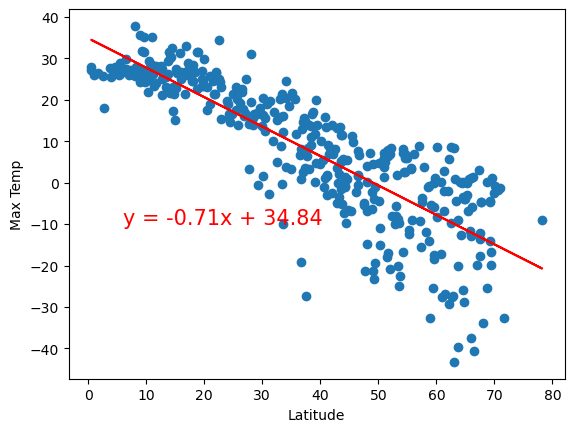

In [29]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))


The r-value is: 0.39317147302306643


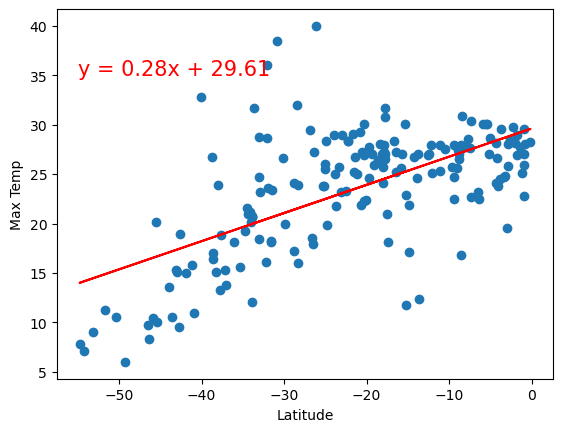

In [30]:
# Linear regression on Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,35))


**Discussion about the linear relationship:** The high r-value of 0.707 for the Northern Hemisphere indicates a strong positive correlation between latitude and max temperature. In contrast, the r-value of 0.393 for the Southern Hemisphere suggests a weak to moderate positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1554825241071946


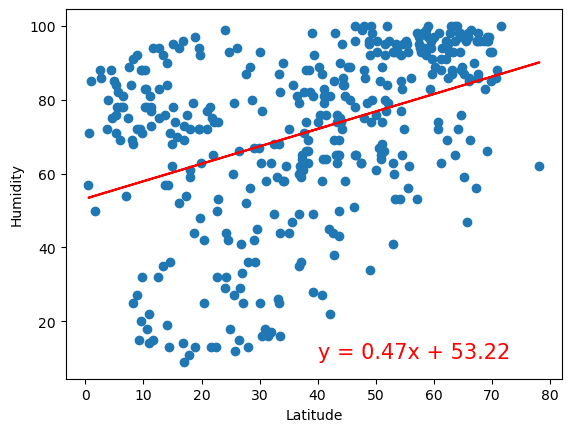

In [32]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,10))

The r-value is: 0.02841287880718302


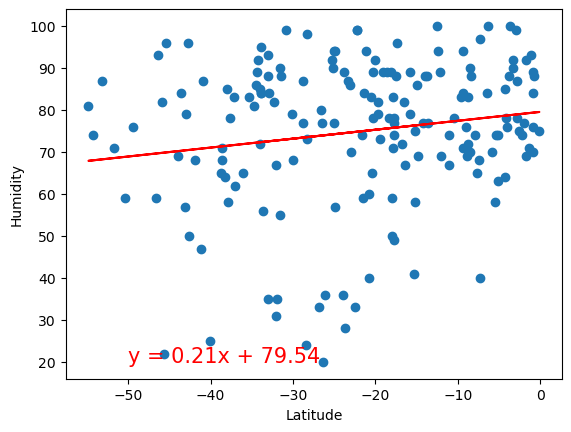

In [33]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,20))

**Discussion about the linear relationship:** The low r-values of 0.155 for the Northern Hemisphere and 0.028 for the Southern Hemisphere indicate a weak to no real relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.041229489608215604


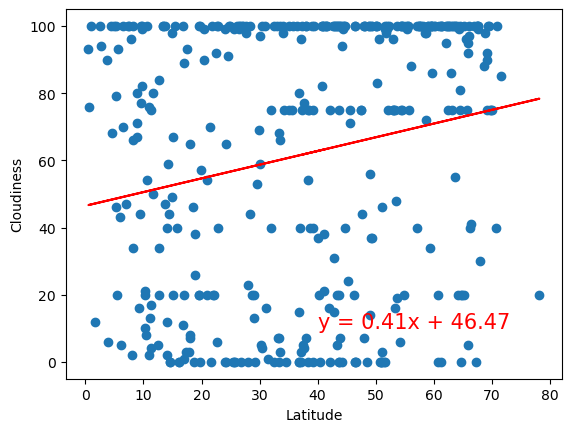

In [34]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.08846536631197409


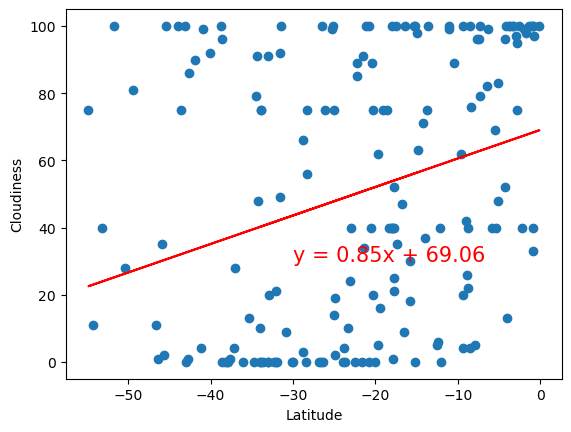

In [35]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** The low r-values of 0.041 for the Northern Hemisphere and 0.088 for the Southern Hemisphere indicate a very weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 3.8203847211369215e-05


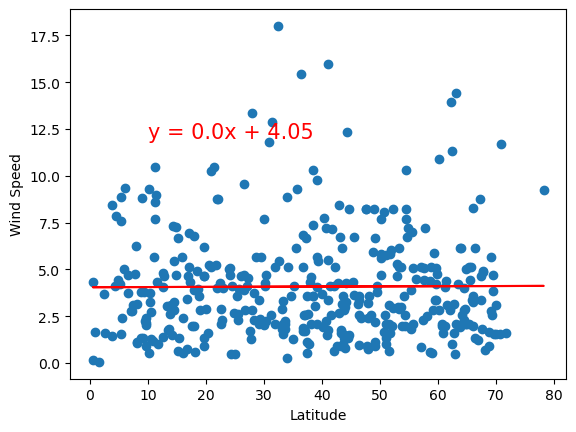

In [36]:
# Northern Hemisphere
x_values = Northern_Hemisphere_df["Lat"]
y_values = Northern_Hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.07140753308749709


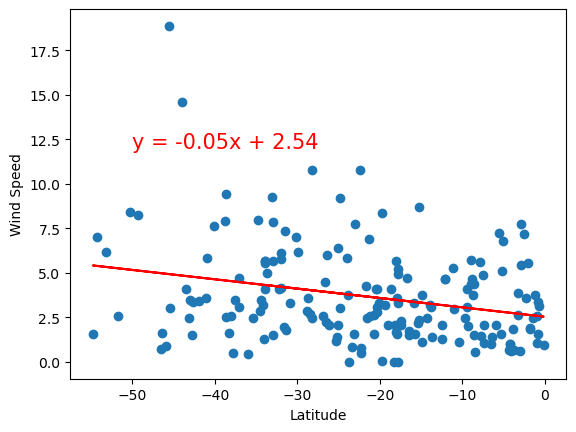

In [37]:
# Southern Hemisphere
x_values = Southern_Hemisphere_df["Lat"]
y_values = Southern_Hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,12))

**Discussion about the linear relationship:** The low r-values of 0.000 for the Northern Hemisphere and 0.071 for the Southern Hemisphere indicate that there is no real relationship between latitude and cloudiness. The difference between the hemispheres is minimal and not significant enough to comment upon.